In [1]:
import pandas as pd
import random

In [2]:
df = pd.read_csv('Products.CSV')

In [3]:
df

,product_code,line,category,color,price
0,ot_grey,Ocly,t-shirt,grey,11.40
1,ot_black,Ocly,t-shirt,black,11.40
2,ot_white,Ocly,t-shirt,white,11.40
3,ojean,Ocly,jeans,blue,33.25
4,opolo,Ocly,polo shirt,blue,14.25
5,oh_grey,Ocly,hoodie,grey,26.60
6,oh_black,Ocly,hoodie,black,26.60
7,oh_white,Ocly,hoodie,white,26.60
8,vt_grey,Verchecco,t-shirt,grey,12.36
9,vt_black,Verchecco,t-shirt,black,12.36


In [4]:
prod_dic = {}
for i in range(len(df)):
    p = df.iloc[i, 0]
    line = df.iloc[i, 1]
    cate = df.iloc[i, 2] 
    cols = df.iloc[i, 3]
    prod_dic[p] = [line, cate, cols]
    

In [25]:
durability_dic = {'Ocly' : [10, 3], 'Piaris' : [3, 2], 'Verchecco' : [1 , 2], 't-shirt' : [8, 1], 'hoodie' : [7, 2],
                 'polo shirt' : [5, 3], 'jeans' : [2, 0.5]}
qual_dic = {'Ocly' : [5, 1], 'Piaris' : [2, 1], 'Verchecco' : [6 , 1], 't-shirt' : [3, 0.8], 'hoodie' : [5, 1],
                 'polo shirt' : [3, 1], 'jeans' : [4, 1.2]}
color_dic = {'grey' : [8, 2], 'blue' : [20, 5], 'white' : [35, 7], 'black' : [5, 3]}
fit_dic = {'XS' : [12, 4], 'S' : [6, 2], 'M' : [10, 5], 'L' : [12, 5], 'XL' : [15, 6], 'XXL' : [20, 4], 
           't-shirt' : [15, 4], 'hoodie' : [22, 10], 'polo shirt' : [16, 3], 'jeans' : [7, 4]}
vfm_dic = {'Ocly' : [5, 1], 'Piaris' : [7, 3], 'Verchecco' : [5 , 3], 't-shirt' : [10, 5], 'hoodie' : [12, 4],
                 'polo shirt' : [4, 1], 'jeans' : [6, 2.2]}
sat_dic = {'1' : 0.6, '2' : 0.8, '3' : 0.99, '4' : 1.08, '5' : 1.15}

In [9]:
prod_dic['ot_grey']

['Ocly', 't-shirt', 'grey']

In [17]:
bases = {'durability' : {'Ocly' : 85, 'Piaris' : 70, 'Verchecco' : 78},
         'vfm' : {'Ocly' : 72, 'Piaris' : 50, 'Verchecco' : 62},
         'color' : {'Ocly' : 50, 'Piaris' : 62, 'Verchecco' : 75},
         'quality' : {'Ocly' : 84, 'Piaris' : 40, 'Verchecco' : 81},
         'fit' : {'Ocly' : 84, 'Piaris' : 88, 'Verchecco' : 72}}

In [26]:
def score_gen(product, state):

    dur_base = np.random.normal(bases['durability'][prod_dic[product][0]], 5)
    qual_base = np.random.normal(bases['quality'][prod_dic[product][0]], 7)
    color_base = np.random.normal(bases['color'][prod_dic[product][0]], 15)
    fit_base = np.random.normal(bases['fit'][prod_dic[product][0]], 10)
    vfm_base = np.random.normal(bases['vfm'][prod_dic[product][0]], 14)
    satis = random.choices(population = ['5', '4', '3', '2', '1'], weights = [0.1, 0.3, 0.4, 0.15, 0.05], k = 1)[0]
    size = random.choices(population = ['XS', 'S', 'M', 'L', 'XL', 'XXL'], weights = [0.05, 0.1, 0.4, 0.3, 0.1, 0.05], k = 1)[0]
    if state in ['New York', 'New Jersey', 'Pennsylvania']:
        s_m = 1
    elif state in ['Ohio']:
        s_m = 2
    else:
        s_m = 3
   
    dur_base += np.random.normal(durability_dic[prod_dic[product][0]][0],durability_dic[prod_dic[product][0]][1]) 
    dur_base += np.random.normal(durability_dic[prod_dic[product][1]][0],durability_dic[prod_dic[product][1]][1])
    if dur_base > 100:
        dur_base = random.randint(94, 100)
    qual_base += np.random.normal(qual_dic[prod_dic[product][0]][0],qual_dic[prod_dic[product][0]][1]) 
    qual_base += np.random.normal(qual_dic[prod_dic[product][1]][0],qual_dic[prod_dic[product][1]][1])
    if qual_base > 100:
        qual_base = random.randint(89, 100)
    color_base += np.random.normal(color_dic[prod_dic[product][2]][0],color_dic[prod_dic[product][2]][1]) 
    
    if color_base > 100:
        color_base = random.randint(92, 100)
    if color_base < 0:
        color_base = random.randint(0, 10)
    vfm_base += np.random.normal(vfm_dic[prod_dic[product][0]][0],vfm_dic[prod_dic[product][0]][1]) 
    vfm_base += np.random.normal(vfm_dic[prod_dic[product][1]][0],vfm_dic[prod_dic[product][1]][1])
    if vfm_base > 100:
        vfm_base = random.randint(85, 100)
    fit_base += np.random.normal(fit_dic[size][0], fit_dic[size][1])
    fit_base += np.random.normal(fit_dic[prod_dic[product][1]][0], fit_dic[prod_dic[product][1]][1])
    if fit_base > 100:
        fit_base = random.randint(78, 92)
        
    over_base = np.random.normal(np.mean([dur_base, qual_base, qual_base, qual_base, color_base, vfm_base, vfm_base, fit_base])) 
    over_base = over_base * np.random.normal(sat_dic[satis], 0.1) + np.random.normal(12, s_m * 3)
    if over_base > 100:
        over_base = random.randint(83, 100)
        
    return int(round(over_base, 0)), int(round(dur_base, 0)), int(round(qual_base, 0)), int(round(color_base, 0)), int(round(vfm_base, 0)), int(round(fit_base, 0))

In [12]:
import numpy as np

In [7]:
score_gen('pt_white')

(95, 89, 82, 42, 70, 'L')

In [13]:
df2 = pd.read_csv('Q3 Sales.CsV')

In [14]:
d = pd.read_csv('Delivery.csv')
m = pd.merge(left = df2, right = d)

In [15]:
m

,transaction_id,sale_id,product_id,member_id,sale_date,firstname,surname,address_1,address_2,state,zip
0,AAA118146,1,ojean,jbon3303,2023-10-01,Jasmine,Bond,003 Beard Streets Suite 878,East Amy,New York,84482
1,AAA118147,1,vh_white,NaN,2023-10-01,Daniel,Lawson,8021 Gomez Mountains,Baileytown,New York,80279
2,AAA118148,1,vt_black,jgon2541,2023-10-01,Joe,Gonzalez,3245 Tiffany Ways Apt. 522,South Tina,Ohio,57088
3,AAA118148,2,vh_white,jgon2541,2023-10-01,Joe,Gonzalez,3245 Tiffany Ways Apt. 522,South Tina,Ohio,57088
4,AAA118148,3,pjean,jgon2541,2023-10-01,Joe,Gonzalez,3245 Tiffany Ways Apt. 522,South Tina,Ohio,57088
...,...,...,...,...,...,...,...,...,...,...,...
13218,AAA125664,1,vt_black,NaN,2023-12-31,Susan,Campbell,741 Derrick Crossing,Buchananton,New Jersey,67184
13219,AAA125665,1,pt_black,npat3036,2023-12-31,Natasha,Patterson,USCGC Powell,FPO AP 03201,New Jersey,7912
13220,AAA125665,2,opolo,npat3036,2023-12-31,Natasha,Patterson,USCGC Powell,FPO AP 03201,New Jersey,7912
13221,AAA125665,3,ot_black,npat3036,2023-12-31,Natasha,Patterson,USCGC Powell,FPO AP 03201,New Jersey,7912


In [27]:
transaction_id = []
sale_id = []

overall = []
qual = []
dur = []
color = []
sizes = []
fit = []
vfm = []

n = 793

for i in range(len(m)):
    r = random.randint(1, 6)
    if r > 2:
        scores = score_gen(m.iloc[i, 2], m.iloc[i, 9])
        transaction_id.append(m.iloc[i, 0])
        n += 1
        sale_id.append(m.iloc[i, 1])
        overall.append(scores[0])
        qual.append(scores[2])
        dur.append(scores[1])
        color.append(scores[3])
        vfm.append(scores[4])
        fit.append(scores[5])


        

In [28]:
output = pd.DataFrame({'Transaction ID' : transaction_id, 'Sale ID' : sale_id, 'Overall Score' : overall,
                      'Durability Score' : dur, 'Quality Score' : qual, 'Color Score' : color, 
                      'Value For Money Score' : vfm, 'Fit Score': fit})

In [34]:
output

,Transaction ID,Sale ID,Overall Score,Durability Score,Quality Score,Color Score,Value For Money Score,Fit Score
0,AAA118147,1,76,93,96,100,87,80
1,AAA118148,2,98,89,91,95,82,89
2,AAA118149,1,74,79,41,92,48,85
3,AAA118150,1,83,83,62,64,58,90
4,AAA118151,2,84,84,48,69,59,84
...,...,...,...,...,...,...,...,...
8843,AAA125663,4,95,75,39,92,88,91
8844,AAA125665,1,78,90,37,45,74,87
8845,AAA125665,2,83,97,89,64,82,79
8846,AAA125665,3,98,95,82,47,67,91


In [32]:
output.to_csv('FF_Review_Scores.csv', index = False)

In [42]:
output.T.to_json()

'{"0":{"Transaction ID":"AAA118146","Sale ID":1,"Overall Score":95,"Durability Score":91,"Quality Score":78,"Color Score":31,"Value For Money Score":59},"1":{"Transaction ID":"AAA118147","Sale ID":1,"Overall Score":89,"Durability Score":96,"Quality Score":85,"Color Score":32,"Value For Money Score":70},"2":{"Transaction ID":"AAA118148","Sale ID":1,"Overall Score":96,"Durability Score":91,"Quality Score":93,"Color Score":25,"Value For Money Score":87},"3":{"Transaction ID":"AAA118148","Sale ID":2,"Overall Score":99,"Durability Score":91,"Quality Score":90,"Color Score":37,"Value For Money Score":100},"4":{"Transaction ID":"AAA118148","Sale ID":3,"Overall Score":95,"Durability Score":85,"Quality Score":67,"Color Score":56,"Value For Money Score":78},"5":{"Transaction ID":"AAA118149","Sale ID":1,"Overall Score":90,"Durability Score":81,"Quality Score":82,"Color Score":28,"Value For Money Score":53},"6":{"Transaction ID":"AAA118150","Sale ID":1,"Overall Score":94,"Durability Score":96,"Qua

In [33]:
output.T.to_json('FF_Review_Score.json')

In [24]:
output['Overall Score'].value_counts()

88    368
86    358
90    329
91    322
89    320
     ... 
35      3
37      2
39      2
36      1
30      1
Name: Overall Score, Length: 67, dtype: int64

<Axes: >

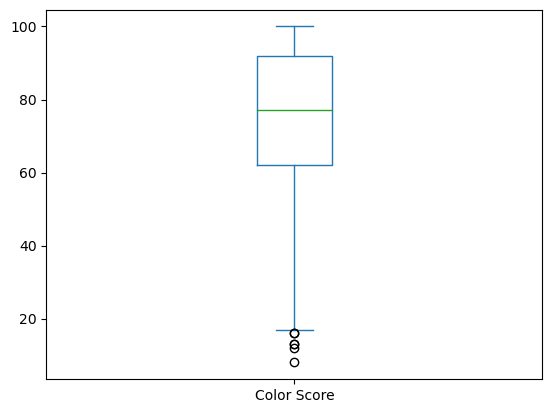

In [30]:
output['Color Score'].plot(kind = 'box')

<Axes: >

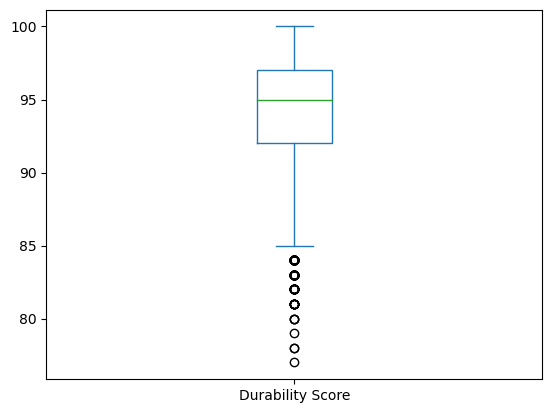

In [57]:
output['Durability Score'].plot(kind = 'box')

<Axes: >

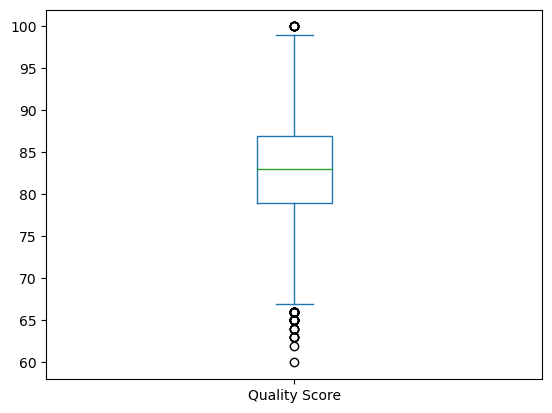

In [58]:
output['Quality Score'].plot(kind = 'box')

<Axes: >

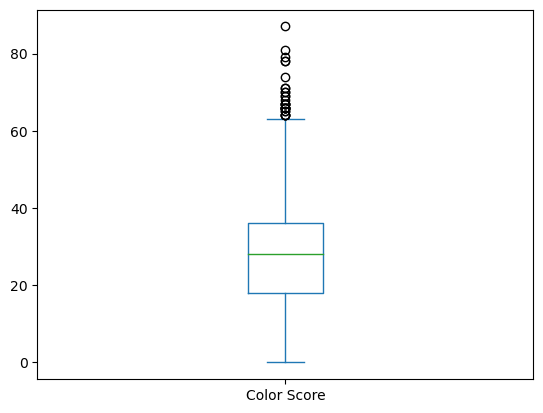

In [59]:
output['Color Score'].plot(kind = 'box')

<Axes: >

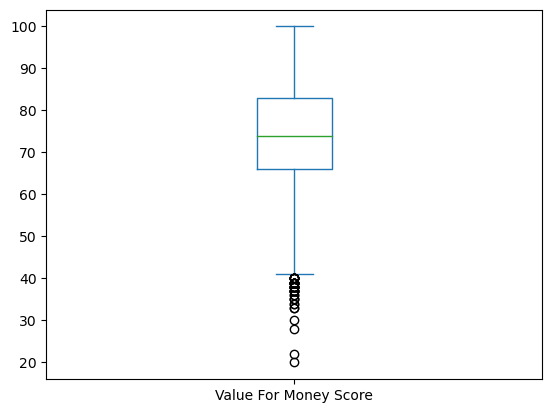

In [60]:
output['Value For Money Score'].plot(kind = 'box')